# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

132. Import and inspect the cars dataset (cars.csv)!

In [2]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [4]:
cars.model_year = cars.model_year.add(1900)

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

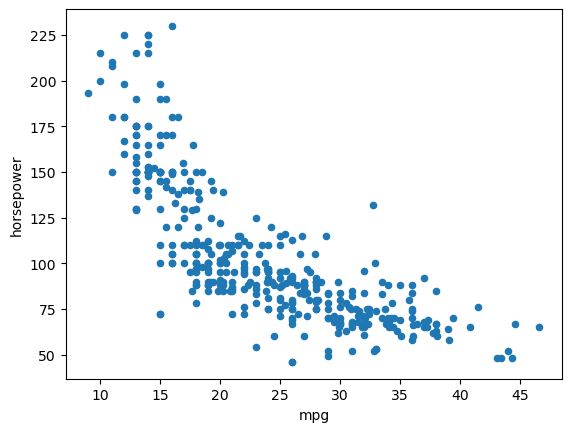

In [6]:
cars.plot(kind = 'scatter', x = 'mpg', y = 'horsepower')
plt.show()

In [7]:
cars['gpm'] = (1 / cars.mpg * 100).round(2)

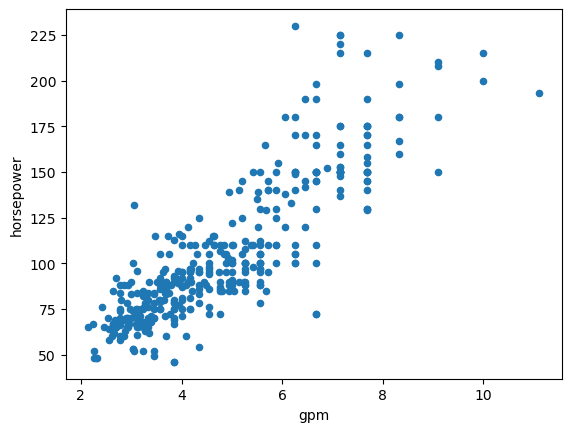

In [8]:
cars.plot(kind = 'scatter', x = 'gpm', y = 'horsepower')
plt.show()

135. Create a __new column__ with the __manufacturer__ name!

In [9]:
cars[['manufacturer', 'model']] = cars.name.str.split(' ', n = 1, expand = True)

In [10]:
cars.manufacturer = cars.manufacturer.str.strip()

In [11]:
cars.model = cars.model.str.strip()

136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [12]:
continent = {
    'usa': 'north america',
    'japan': 'asia',
    'europe': 'europe'
}

In [13]:
cars['continent'] = cars.origin.map(continent)

In [14]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,model,continent
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,chevelle malibu,north america
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,skylark 320,north america
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,satellite,north america
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,rebel sst,north america
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,torino,north america
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl,3.70,ford,mustang gl,north america
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup,2.27,vw,pickup,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage,3.12,dodge,rampage,north america
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger,3.57,ford,ranger,north america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

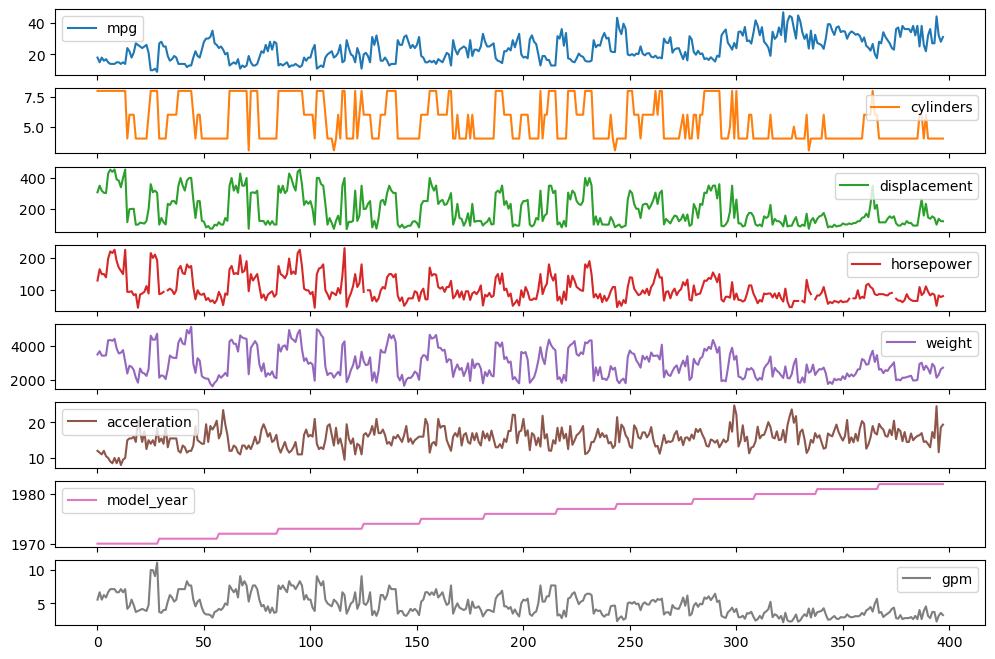

In [15]:
cars.plot(subplots = True, figsize = (12, 8))
plt.show()

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

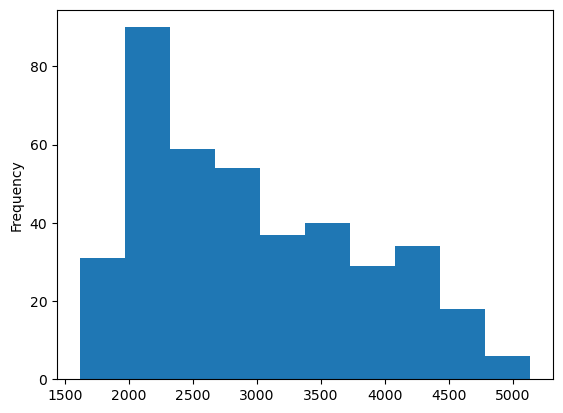

In [16]:
cars.weight.plot(kind = "hist")
plt.show()

In [17]:
labels = ["light", "medium", "heavy"]

In [18]:
pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels).value_counts()

weight
medium    198
light     100
heavy     100
Name: count, dtype: int64

In [19]:
cars["weight_cat"] = pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels)

139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [20]:
cars.drop(columns = ["cylinders", "displacement", "weight", "acceleration", "name", "manufacturer", "mpg"], inplace = True)

In [21]:
cars.head()

,horsepower,model_year,origin,gpm,model,continent,weight_cat
0,130.0,1970,usa,5.56,chevelle malibu,north america,medium
1,165.0,1970,usa,6.67,skylark 320,north america,heavy
2,150.0,1970,usa,5.56,satellite,north america,medium
3,150.0,1970,usa,6.25,rebel sst,north america,medium
4,140.0,1970,usa,5.88,torino,north america,medium


140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

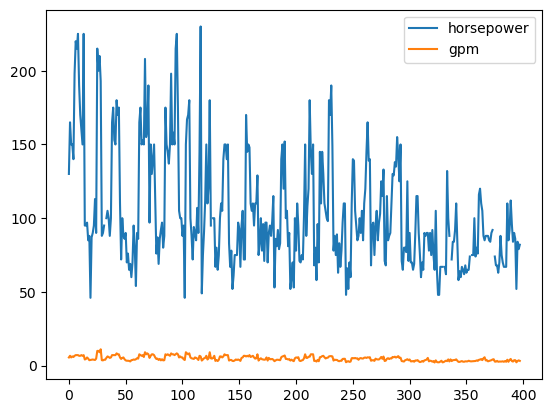

In [25]:
# cars.horsepower.plot()
# cars.gpm.plot()
# The above lines gives the same result

cars.loc[:, ['horsepower', 'gpm']].plot()
plt.show()

In [27]:
cars_stat = cars.loc[:, ['horsepower', 'gpm']].describe()

In [30]:
cars_stat

,horsepower,gpm
count,392.000000,398.000000
mean,104.469388,4.767211
std,38.491160,1.658479
min,46.000000,2.150000
25%,75.000000,3.450000
50%,93.500000,4.350000
75%,126.000000,5.710000
max,230.000000,11.110000


In [33]:
horsepower_mean = cars_stat.loc['mean', 'horsepower']
horsepower_std = cars_stat.loc['std', 'horsepower']

In [34]:
print(horsepower_mean, horsepower_std)

104.46938775510205 38.49115993282855


In [36]:
gpm_mean = cars_stat.loc['mean', 'gpm']
gpm_std = cars_stat.loc['std', 'gpm']

In [41]:
print(f'{gpm_mean}, {gpm_std}')

4.767211055276382, 1.658478714979087


In [43]:
cars['horsepower_z'] = round((cars.horsepower - horsepower_mean) / horsepower_std, 2)

In [45]:
cars['gpm_z'] = round((cars.gpm - gpm_mean) / gpm_std, 2)

In [46]:
cars

,horsepower,model_year,origin,gpm,model,continent,weight_cat,horsepower_z,gpm_z
0,130.0,1970,usa,5.56,chevelle malibu,north america,medium,0.66,0.48
1,165.0,1970,usa,6.67,skylark 320,north america,heavy,1.57,1.15
2,150.0,1970,usa,5.56,satellite,north america,medium,1.18,0.48
3,150.0,1970,usa,6.25,rebel sst,north america,medium,1.18,0.89
4,140.0,1970,usa,5.88,torino,north america,medium,0.92,0.67
...,...,...,...,...,...,...,...,...,...
393,86.0,1982,usa,3.70,mustang gl,north america,medium,-0.48,-0.64
394,52.0,1982,europe,2.27,pickup,europe,light,-1.36,-1.51
395,84.0,1982,usa,3.12,rampage,north america,medium,-0.53,-0.99
396,79.0,1982,usa,3.57,ranger,north america,medium,-0.66,-0.72


In [47]:
cars.describe()

,horsepower,model_year,gpm,horsepower_z,gpm_z
count,392.000000,398.000000,398.000000,392.000000,398.000000
mean,104.469388,1976.010050,4.767211,-0.001811,0.000477
std,38.491160,3.697627,1.658479,0.999803,0.999909
min,46.000000,1970.000000,2.150000,-1.520000,-1.580000
25%,75.000000,1973.000000,3.450000,-0.770000,-0.790000
50%,93.500000,1976.000000,4.350000,-0.285000,-0.250000
75%,126.000000,1979.000000,5.710000,0.557500,0.570000
max,230.000000,1982.000000,11.110000,3.260000,3.820000


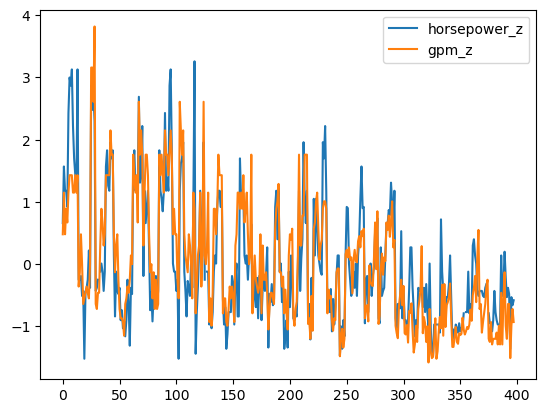

In [48]:
cars.loc[:, ['horsepower_z', 'gpm_z']].plot()
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [54]:
cars = pd.get_dummies(data = cars, columns = ['model_year', 'origin'], drop_first = True, dtype = 'int')

In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   horsepower       392 non-null    float64 
 1   gpm              398 non-null    float64 
 2   model            396 non-null    object  
 3   continent        398 non-null    object  
 4   weight_cat       398 non-null    category
 5   horsepower_z     392 non-null    float64 
 6   gpm_z            398 non-null    float64 
 7   model_year_1971  398 non-null    int32   
 8   model_year_1972  398 non-null    int32   
 9   model_year_1973  398 non-null    int32   
 10  model_year_1974  398 non-null    int32   
 11  model_year_1975  398 non-null    int32   
 12  model_year_1976  398 non-null    int32   
 13  model_year_1977  398 non-null    int32   
 14  model_year_1978  398 non-null    int32   
 15  model_year_1979  398 non-null    int32   
 16  model_year_1980  398 non-null    int32   
 1

In [56]:
cars.head()

,horsepower,gpm,model,continent,weight_cat,horsepower_z,gpm_z,model_year_1971,model_year_1972,model_year_1973,...,model_year_1975,model_year_1976,model_year_1977,model_year_1978,model_year_1979,model_year_1980,model_year_1981,model_year_1982,origin_japan,origin_usa
0,130.0,5.56,chevelle malibu,north america,medium,0.66,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,165.0,6.67,skylark 320,north america,heavy,1.57,1.15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,5.56,satellite,north america,medium,1.18,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150.0,6.25,rebel sst,north america,medium,1.18,0.89,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140.0,5.88,torino,north america,medium,0.92,0.67,0,0,0,...,0,0,0,0,0,0,0,0,0,1


-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True